In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import LabelEncoder,StandardScaler,normalize
from sklearn.decomposition import PCA,LatentDirichletAllocation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [2]:
#  pip install numpy==1.21.4

In [3]:
movie_df=pd.read_csv('Cleaned_movie.csv')
movie_df

,Unnamed: 0,title_x,budget,original_language,popularity,release_date,revenue,runtime,vote_average,country,Lead_Actor,Second_Lead_Actor,Main_Production_House,Genres,Director,profit,Votes
0,0,Avatar,237000000,en,150.437577,10-12-2009,2787965087,162.0,7.2,United States of America,Sam Worthington,Zoe Saldana,Ingenious Film Partners,Action,James Cameron,2550965087,High_vote
1,1,Pirates of the Caribbean: At World's End,300000000,en,139.082615,19-05-2007,961000000,169.0,6.9,United States of America,Johnny Depp,Orlando Bloom,Walt Disney Pictures,Adventure,Gore Verbinski,661000000,Avg_Vote
2,2,Spectre,245000000,en,107.376788,26-10-2015,880674609,148.0,6.3,United Kingdom,Daniel Craig,Christoph Waltz,Columbia Pictures,Action,Sam Mendes,635674609,Avg_Vote
3,3,The Dark Knight Rises,250000000,en,112.312950,16-07-2012,1084939099,165.0,7.6,United States of America,Christian Bale,Michael Caine,Legendary Pictures,Action,Christopher Nolan,834939099,High_vote
4,4,John Carter,260000000,en,43.926995,07-03-2012,284139100,132.0,6.1,United States of America,Taylor Kitsch,Lynn Collins,Walt Disney Pictures,Action,Andrew Stanton,24139100,Avg_Vote
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,4795,Bang,17000000,en,0.918116,09-09-1995,25871834,98.0,6.0,United States of America,Darling Narita,Peter Greene,Asylum Films,Drama,Ash Baron-Cohen,8871834,Less_Vote
4413,4796,Primer,17000000,en,23.307949,08-10-2004,424760,77.0,6.9,United States of America,Shane Carruth,David Sullivan,Thinkfilm,Science Fiction,Shane Carruth,-16575240,Less_Vote
4414,4798,El Mariachi,17000000,es,14.269792,04-09-1992,2040920,81.0,6.6,Mexico,Carlos Gallardo,Jaime de Hoyos,Columbia Pictures,Action,Robert Rodriguez,-14959080,Less_Vote
4415,4800,"Signed, Sealed, Delivered",17000000,en,1.444476,13-10-2013,25871834,120.0,7.0,United States of America,Eric Mabius,Kristin Booth,Front Street Pictures,Comedy,Scott Smith,8871834,Less_Vote


In [4]:
# Dropping un wanted columns.
movie_df.drop('Unnamed: 0',axis=1,inplace=True)
movie_df

,title_x,budget,original_language,popularity,release_date,revenue,runtime,vote_average,country,Lead_Actor,Second_Lead_Actor,Main_Production_House,Genres,Director,profit,Votes
0,Avatar,237000000,en,150.437577,10-12-2009,2787965087,162.0,7.2,United States of America,Sam Worthington,Zoe Saldana,Ingenious Film Partners,Action,James Cameron,2550965087,High_vote
1,Pirates of the Caribbean: At World's End,300000000,en,139.082615,19-05-2007,961000000,169.0,6.9,United States of America,Johnny Depp,Orlando Bloom,Walt Disney Pictures,Adventure,Gore Verbinski,661000000,Avg_Vote
2,Spectre,245000000,en,107.376788,26-10-2015,880674609,148.0,6.3,United Kingdom,Daniel Craig,Christoph Waltz,Columbia Pictures,Action,Sam Mendes,635674609,Avg_Vote
3,The Dark Knight Rises,250000000,en,112.312950,16-07-2012,1084939099,165.0,7.6,United States of America,Christian Bale,Michael Caine,Legendary Pictures,Action,Christopher Nolan,834939099,High_vote
4,John Carter,260000000,en,43.926995,07-03-2012,284139100,132.0,6.1,United States of America,Taylor Kitsch,Lynn Collins,Walt Disney Pictures,Action,Andrew Stanton,24139100,Avg_Vote
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,Bang,17000000,en,0.918116,09-09-1995,25871834,98.0,6.0,United States of America,Darling Narita,Peter Greene,Asylum Films,Drama,Ash Baron-Cohen,8871834,Less_Vote
4413,Primer,17000000,en,23.307949,08-10-2004,424760,77.0,6.9,United States of America,Shane Carruth,David Sullivan,Thinkfilm,Science Fiction,Shane Carruth,-16575240,Less_Vote
4414,El Mariachi,17000000,es,14.269792,04-09-1992,2040920,81.0,6.6,Mexico,Carlos Gallardo,Jaime de Hoyos,Columbia Pictures,Action,Robert Rodriguez,-14959080,Less_Vote
4415,"Signed, Sealed, Delivered",17000000,en,1.444476,13-10-2013,25871834,120.0,7.0,United States of America,Eric Mabius,Kristin Booth,Front Street Pictures,Comedy,Scott Smith,8871834,Less_Vote


In [5]:
#Calculating Average value to use in for loop while creating new column based on condition.
mean_av=movie_df.vote_average.mean()
mean_av

6.182363595200358

In [6]:
# Creating Column Rating For classification problem.
rating=[]
for i in movie_df.vote_average:
    if i > mean_av:
        rating.append('Good')
    elif i >= mean_av/2 and i <=mean_av:
        rating.append('Average')
    elif i < mean_av/2:
        rating.append('Poor')
movie_df['Rating']=rating

In [7]:
# Displaying table after inserting rating column
movie_df

,title_x,budget,original_language,popularity,release_date,revenue,runtime,vote_average,country,Lead_Actor,Second_Lead_Actor,Main_Production_House,Genres,Director,profit,Votes,Rating
0,Avatar,237000000,en,150.437577,10-12-2009,2787965087,162.0,7.2,United States of America,Sam Worthington,Zoe Saldana,Ingenious Film Partners,Action,James Cameron,2550965087,High_vote,Good
1,Pirates of the Caribbean: At World's End,300000000,en,139.082615,19-05-2007,961000000,169.0,6.9,United States of America,Johnny Depp,Orlando Bloom,Walt Disney Pictures,Adventure,Gore Verbinski,661000000,Avg_Vote,Good
2,Spectre,245000000,en,107.376788,26-10-2015,880674609,148.0,6.3,United Kingdom,Daniel Craig,Christoph Waltz,Columbia Pictures,Action,Sam Mendes,635674609,Avg_Vote,Good
3,The Dark Knight Rises,250000000,en,112.312950,16-07-2012,1084939099,165.0,7.6,United States of America,Christian Bale,Michael Caine,Legendary Pictures,Action,Christopher Nolan,834939099,High_vote,Good
4,John Carter,260000000,en,43.926995,07-03-2012,284139100,132.0,6.1,United States of America,Taylor Kitsch,Lynn Collins,Walt Disney Pictures,Action,Andrew Stanton,24139100,Avg_Vote,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,Bang,17000000,en,0.918116,09-09-1995,25871834,98.0,6.0,United States of America,Darling Narita,Peter Greene,Asylum Films,Drama,Ash Baron-Cohen,8871834,Less_Vote,Average
4413,Primer,17000000,en,23.307949,08-10-2004,424760,77.0,6.9,United States of America,Shane Carruth,David Sullivan,Thinkfilm,Science Fiction,Shane Carruth,-16575240,Less_Vote,Good
4414,El Mariachi,17000000,es,14.269792,04-09-1992,2040920,81.0,6.6,Mexico,Carlos Gallardo,Jaime de Hoyos,Columbia Pictures,Action,Robert Rodriguez,-14959080,Less_Vote,Good
4415,"Signed, Sealed, Delivered",17000000,en,1.444476,13-10-2013,25871834,120.0,7.0,United States of America,Eric Mabius,Kristin Booth,Front Street Pictures,Comedy,Scott Smith,8871834,Less_Vote,Good


In [8]:
#Cross checking by using value count if any errors are there.
movie_df.Rating.value_counts()

Good       2420
Average    1953
Poor         44
Name: Rating, dtype: int64

In [9]:
# # Dropping Vote_Average Column
# movie_df.drop('vote_average',axis=1,inplace=True)

In [10]:
# Information of columns
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4417 entries, 0 to 4416
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title_x                4417 non-null   object 
 1   budget                 4417 non-null   int64  
 2   original_language      4417 non-null   object 
 3   popularity             4417 non-null   float64
 4   release_date           4417 non-null   object 
 5   revenue                4417 non-null   int64  
 6   runtime                4417 non-null   float64
 7   vote_average           4417 non-null   float64
 8   country                4417 non-null   object 
 9   Lead_Actor             4417 non-null   object 
 10  Second_Lead_Actor      4417 non-null   object 
 11  Main_Production_House  4417 non-null   object 
 12  Genres                 4417 non-null   object 
 13  Director               4417 non-null   object 
 14  profit                 4417 non-null   int64  
 15  Vote

In [11]:
#Extracting Year from Release data and dropping Release date
movie_df['Year']=pd.DatetimeIndex(movie_df.release_date).year
movie_df['Month']=pd.DatetimeIndex(movie_df.release_date).month
movie_df.drop('release_date',axis=1,inplace=True)

In [12]:
#Convering the columns from int to object
movie_df.Year=movie_df.Year.astype('object')
movie_df.Month=movie_df.Month.astype('object')

In [13]:
movie_df.nunique()
# title has unique values in each row

title_x                  4415
budget                    301
original_language          34
popularity               4416
revenue                  3238
runtime                   151
vote_average               67
country                    64
Lead_Actor               1864
Second_Lead_Actor        2482
Main_Production_House    1292
Genres                     20
Director                 2087
profit                   3351
Votes                       3
Rating                      3
Year                       89
Month                      12
dtype: int64

In [14]:
# #Dropping Unique rows in table
# movie_df.drop('title_x',axis=1,inplace=True)

In [15]:
# Checking For Duplicaltes
movie_df.duplicated().sum()

0

In [16]:
movie_df=movie_df[movie_df.Rating=='Good']
movie_df.drop('Rating',axis=1,inplace=True)

### EDA

In [17]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2420 entries, 0 to 4416
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title_x                2420 non-null   object 
 1   budget                 2420 non-null   int64  
 2   original_language      2420 non-null   object 
 3   popularity             2420 non-null   float64
 4   revenue                2420 non-null   int64  
 5   runtime                2420 non-null   float64
 6   vote_average           2420 non-null   float64
 7   country                2420 non-null   object 
 8   Lead_Actor             2420 non-null   object 
 9   Second_Lead_Actor      2420 non-null   object 
 10  Main_Production_House  2420 non-null   object 
 11  Genres                 2420 non-null   object 
 12  Director               2420 non-null   object 
 13  profit                 2420 non-null   int64  
 14  Votes                  2420 non-null   object 
 15  Year

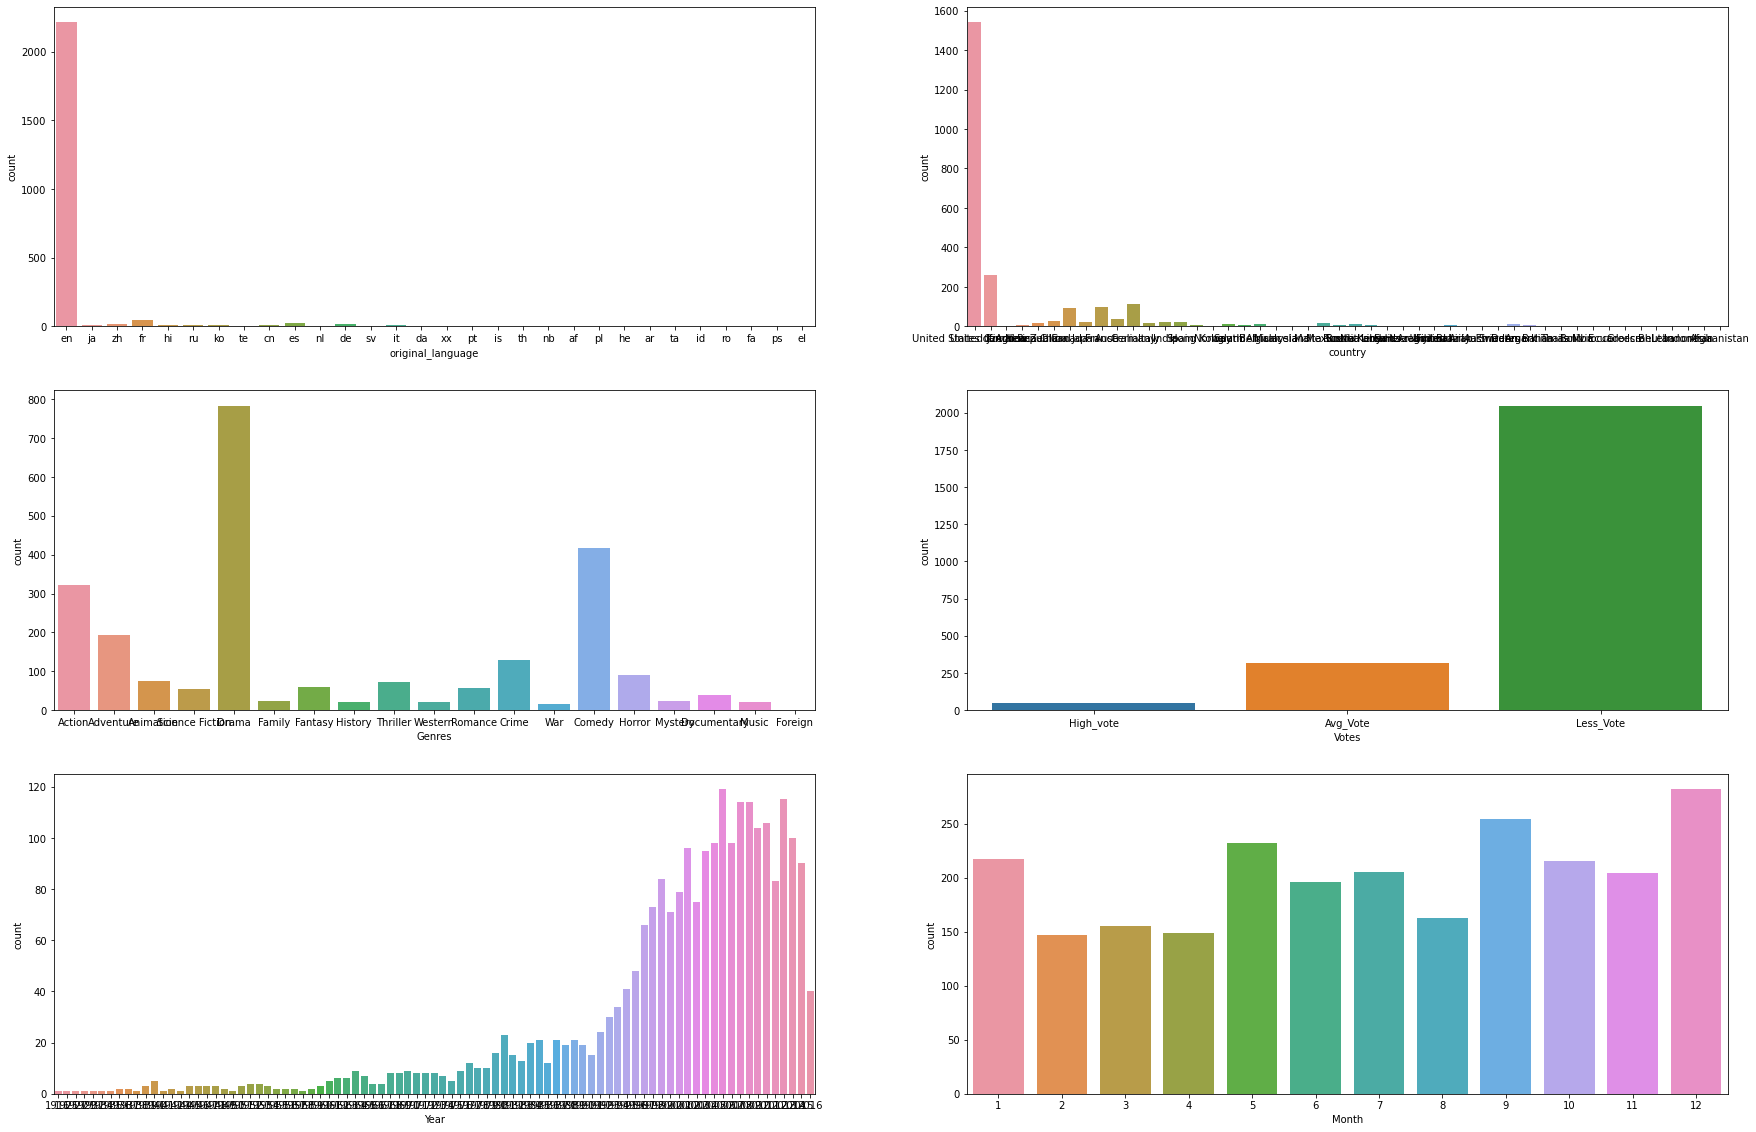

In [18]:
cat=movie_df.select_dtypes('object')
cat.drop(['Director','Main_Production_House','Second_Lead_Actor','Lead_Actor','title_x'],axis=1,inplace=True)
fig,ax=plt.subplots(3,2,figsize=(30,20))
ax=ax.ravel()
for i,j in zip(cat,range(len(cat))):
    sns.countplot(data=movie_df,x=i,ax=ax[j])

In [19]:
# There are more number of average rating in action and comedy movies

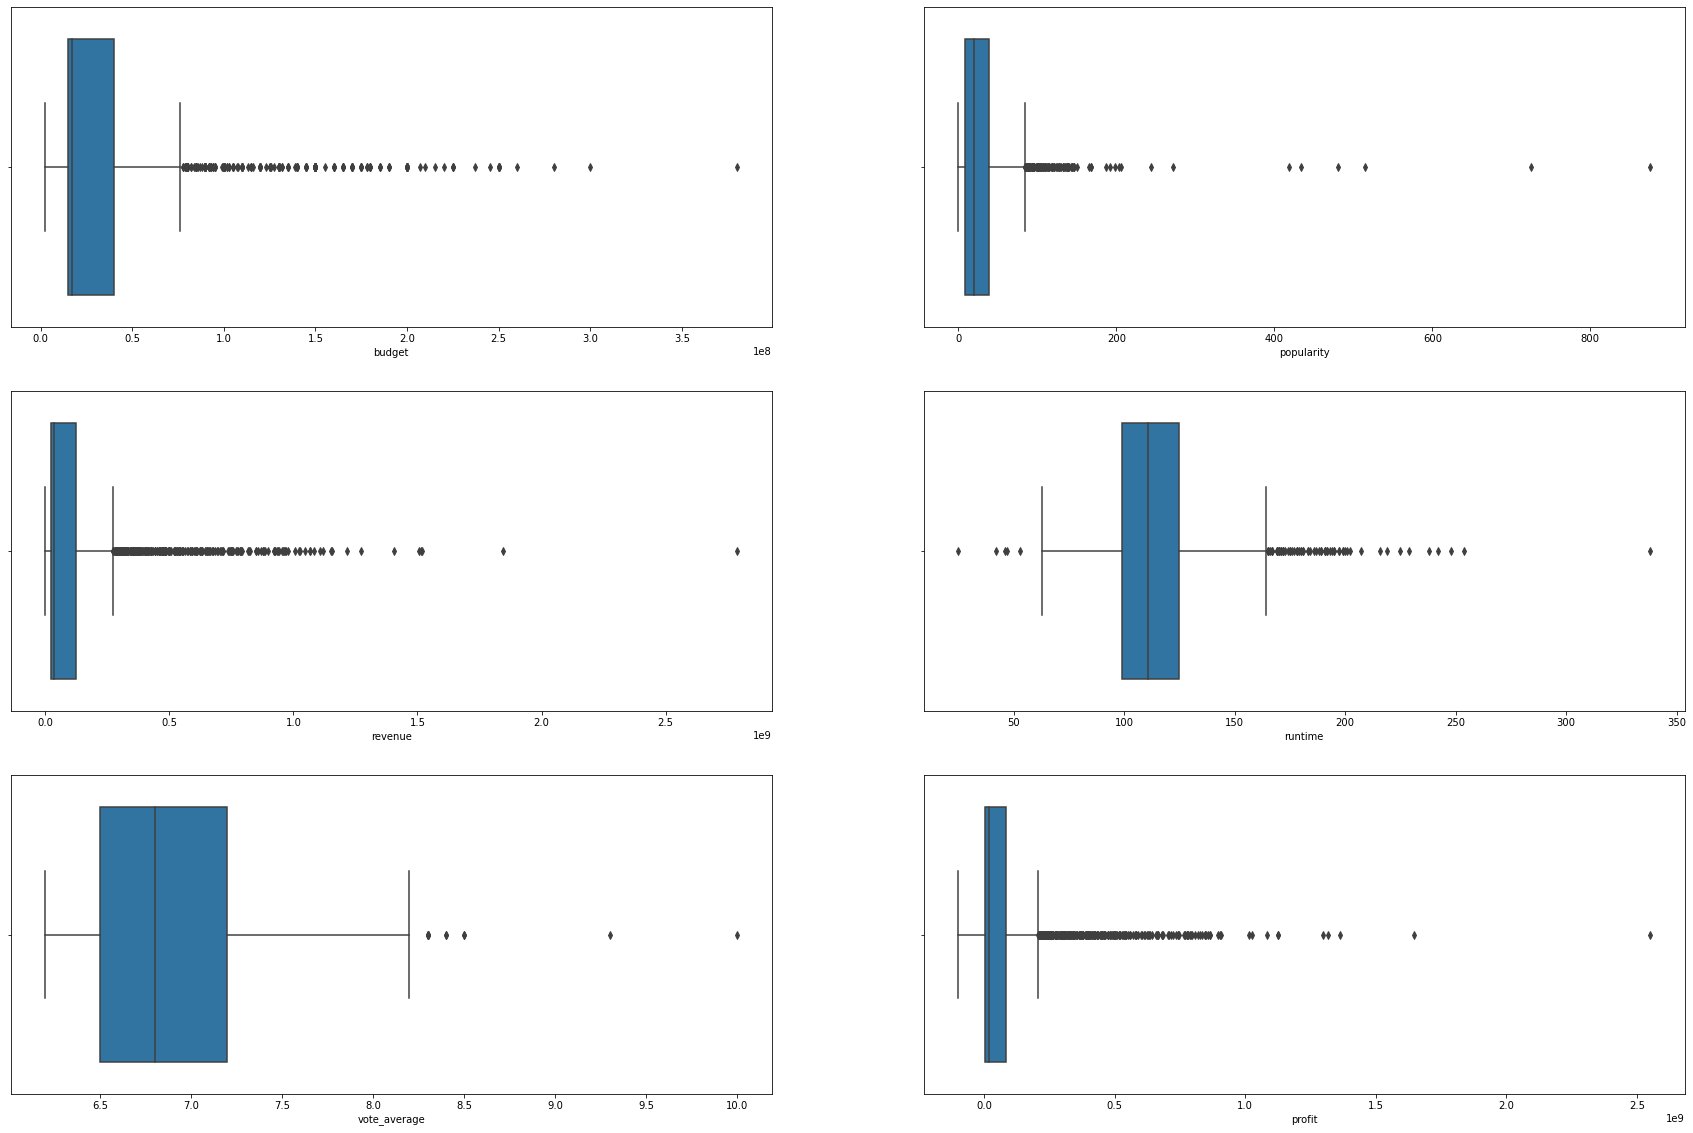

In [20]:
num=movie_df.select_dtypes(['int64','float64'])
fig,ax=plt.subplots(3,2,figsize=(30,20))
ax=ax.ravel()
for i,j in zip(num,range(len(num))):
    sns.boxplot(data=movie_df,x=i,ax=ax[j])

In [21]:
# Outliers present in this are not false input of the data we keep it as it is.

In [22]:
new_movie_df=movie_df.copy()

In [23]:
#Converting data type object to int32
a=list(movie_df.select_dtypes('object'))
for i in a:
    movie_df[i]=LabelEncoder().fit_transform(movie_df[i])
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2420 entries, 0 to 4416
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title_x                2420 non-null   int32  
 1   budget                 2420 non-null   int64  
 2   original_language      2420 non-null   int32  
 3   popularity             2420 non-null   float64
 4   revenue                2420 non-null   int64  
 5   runtime                2420 non-null   float64
 6   vote_average           2420 non-null   float64
 7   country                2420 non-null   int32  
 8   Lead_Actor             2420 non-null   int32  
 9   Second_Lead_Actor      2420 non-null   int32  
 10  Main_Production_House  2420 non-null   int32  
 11  Genres                 2420 non-null   int32  
 12  Director               2420 non-null   int32  
 13  profit                 2420 non-null   int64  
 14  Votes                  2420 non-null   int32  
 15  Year

In [24]:
#Scalling the data to bring to a pericular scale for modelling
scaller_df=pd.DataFrame(normalize(StandardScaler().fit_transform(movie_df)),columns=movie_df.columns)
scaller_df

,title_x,budget,original_language,popularity,revenue,runtime,vote_average,country,Lead_Actor,Second_Lead_Actor,Main_Production_House,Genres,Director,profit,Votes,Year,Month
0,-0.069802,0.229980,-0.008909,0.143348,0.639459,0.099958,0.032022,0.025997,0.056553,0.082309,-0.017744,-0.057873,-0.023132,0.694125,-0.049539,0.028775,0.041762
1,0.014060,0.654376,-0.019307,0.281545,0.437706,0.248281,0.007312,0.056339,-0.005930,0.087247,0.128465,-0.101745,-0.068511,0.352832,-0.257626,0.048080,-0.055920
2,0.061444,0.586909,-0.021866,0.226800,0.448522,0.173640,-0.132350,0.055168,-0.121351,-0.132243,-0.150811,-0.142047,0.130242,0.382133,-0.291780,0.119151,0.102503
3,0.088027,0.545563,-0.019851,0.218917,0.516193,0.236689,0.156471,0.057929,-0.122946,0.064989,-0.017308,-0.128960,-0.132454,0.471752,-0.110390,0.086147,0.002725
4,0.087119,0.729465,-0.025360,0.065365,0.323270,-0.083737,0.145522,0.074003,0.230646,0.056255,0.168743,-0.102547,-0.185050,0.200007,-0.338401,0.091293,0.157348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,-0.281222,-0.115288,0.749989,-0.185686,-0.151899,-0.034903,0.276088,-0.220792,0.050924,0.131264,-0.305975,-0.076554,0.019635,-0.149958,0.106926,-0.058126,-0.066376
2416,0.046797,-0.119067,-0.049691,-0.039366,-0.156444,-0.431776,0.018819,0.145003,0.336500,-0.250431,0.273876,0.591219,0.315192,-0.154364,0.110432,0.068613,0.082194
2417,-0.273144,-0.131540,0.046283,-0.109380,-0.170447,-0.425571,-0.155741,-0.143467,-0.377898,-0.090466,-0.378617,-0.356616,0.295949,-0.167733,0.121999,-0.167835,-0.242268
2418,0.180289,-0.180134,-0.075176,-0.277829,-0.185259,0.103941,0.109052,0.219371,-0.307466,0.102567,-0.279388,-0.211800,0.460072,-0.173165,0.167069,0.354034,0.352406


<AxesSubplot:>

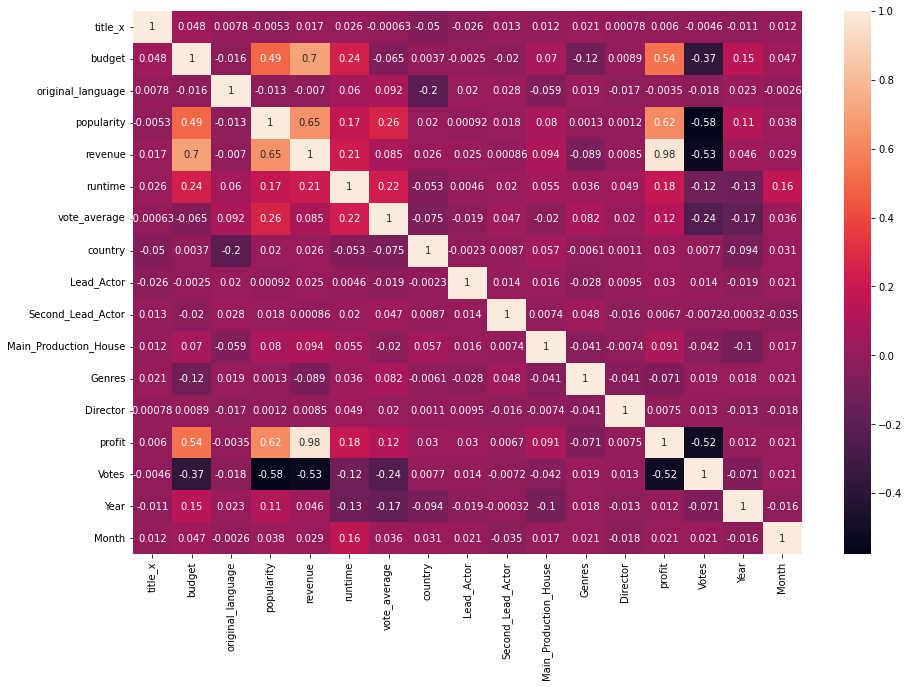

In [25]:
# Visulizing Corelation Matrix using heat map
corr_mat=scaller_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat,annot=True)

In [26]:
# Funtion to identify the corellated columns
def correlation(df,threshold):
    col_corr=set()
    correlation_matrix=df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if(abs(correlation_matrix.iloc[i,j]))>threshold:
                col_name=correlation_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [27]:
correlation(scaller_df,0.7)

{'profit'}

In [28]:
scaller_df.drop('profit',inplace=True,axis=1)

### PCA

In [29]:
pca=PCA()
pca.fit(scaller_df)
features=range(pca.n_components_)
transformed_data=pca.transform(scaller_df)

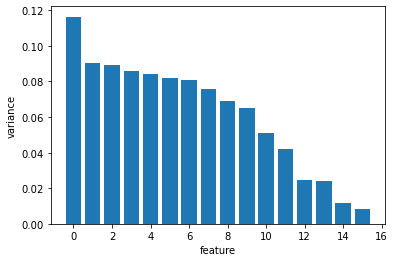

In [30]:
plt.bar(features,pca.explained_variance_ratio_)
plt.xlabel('feature')
plt.ylabel('variance')
plt.show()

In [31]:
pca2=PCA(n_components=2)
trand_data2=pca2.fit_transform(scaller_df)
trand_data2.shape

(2420, 2)

Text(0, 0.5, 'pca2')

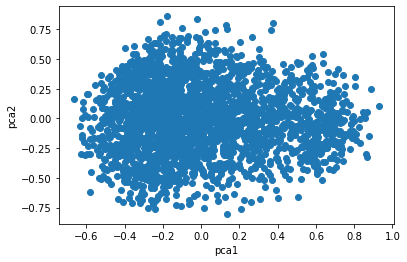

In [32]:
plt.scatter(trand_data2[:,0],trand_data2[:,1])
plt.xlabel('pca1')
plt.ylabel('pca2')

### K Means

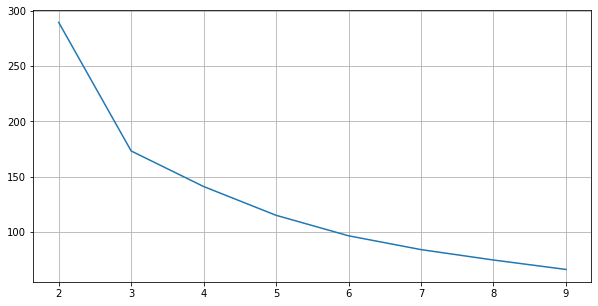

In [33]:
distortion=[]
for i in range(2,10):
    model=KMeans(n_clusters=i).fit(trand_data2)
    distortion.append(model.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(2,10),distortion)
plt.grid()
plt.show()

In [34]:
for i in range(2,10):
    model=KMeans(n_clusters=i).fit(scaller_df)
    score=silhouette_score(trand_data2,model.labels_,metric='euclidean')
    print(f'k = {i}, score = {score}')

k = 2, score = 0.3851903943985639
k = 3, score = 0.13449652265525955
k = 4, score = 0.07432485161124323
k = 5, score = 0.02916634443161462
k = 6, score = 0.008125170299926002
k = 7, score = -0.02493993637593826
k = 8, score = -0.025387161551694865
k = 9, score = -0.07218322577874664


In [35]:
model=KMeans(n_clusters=3).fit(trand_data2)
print(model.cluster_centers_)
print(' ')
print(model.labels_  )

[[-0.13472022  0.26330324]
 [ 0.45786632 -0.04074911]
 [-0.19927256 -0.26100545]]
 
[1 1 1 ... 2 0 2]


Text(0, 0.5, 'pca2')

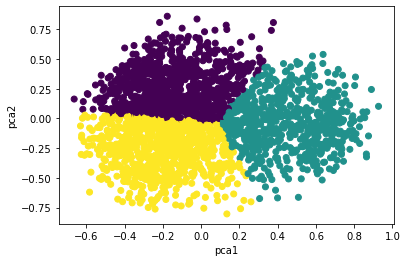

In [36]:
plt.scatter(trand_data2[:,0],trand_data2[:,1],c=model.labels_)
plt.xlabel('pca1')
plt.ylabel('pca2')

### Hirarchical Clustering

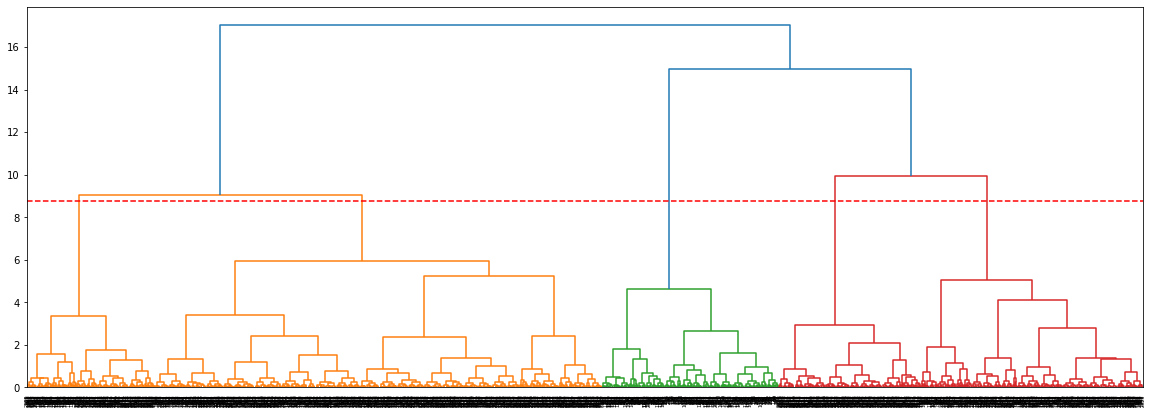

In [37]:
linkage_data=linkage(trand_data2,method='ward',metric='euclidean')
plt.figure(figsize=(20,7))
den=dendrogram(linkage_data)
plt.axhline(y=8.75,color='r',linestyle='--')
plt.show()

In [51]:
hmodel=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hmodel.fit_predict(trand_data2)

array([2, 2, 2, ..., 0, 0, 4], dtype=int64)

Text(0, 0.5, 'pca2')

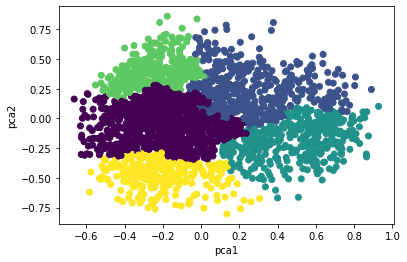

In [52]:
plt.scatter(trand_data2[:,0],trand_data2[:,1],c=hmodel.labels_)
plt.xlabel('pca1')
plt.ylabel('pca2')

### DBSCAN

In [40]:
nn=NearestNeighbors(n_neighbors=5)
nf=nn.fit(trand_data2)
distance,index=nf.kneighbors(trand_data2)

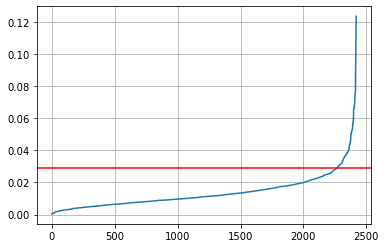

In [41]:
distances=np.sort(distance,axis=0)
distances=distances[:,1]
plt.plot(distances)
plt.axhline(y=0.029,color='r')
plt.grid()
plt.show()

In [42]:
eps=0.029
for i in range(2,15):
    db=DBSCAN(eps=eps,min_samples=i)
    db.fit(trand_data2)
    labels=db.labels_
    
    new_labels=labels+2
    y=np.bincount(new_labels)
    z=np.nonzero(y)[0]
    cluster=list(zip(z,y[z]))
    print('min_sample:',i,'cluster:',cluster)
    score=silhouette_score(trand_data2,new_labels,metric='euclidean')
    print(f'score = {score}')
    print(' ')

min_sample: 2 cluster: [(1, 155), (2, 22), (3, 2), (4, 101), (5, 25), (6, 3), (7, 2), (8, 2), (9, 2), (10, 20), (11, 3), (12, 2), (13, 6), (14, 6), (15, 2), (16, 3), (17, 2), (18, 2), (19, 3), (20, 2), (21, 5), (22, 1582), (23, 3), (24, 2), (25, 6), (26, 2), (27, 3), (28, 3), (29, 6), (30, 4), (31, 8), (32, 6), (33, 21), (34, 2), (35, 2), (36, 3), (37, 18), (38, 3), (39, 2), (40, 36), (41, 2), (42, 5), (43, 3), (44, 2), (45, 4), (46, 5), (47, 2), (48, 3), (49, 2), (50, 3), (51, 3), (52, 2), (53, 2), (54, 3), (55, 3), (56, 3), (57, 3), (58, 3), (59, 3), (60, 2), (61, 2), (62, 5), (63, 18), (64, 69), (65, 4), (66, 4), (67, 6), (68, 6), (69, 4), (70, 2), (71, 3), (72, 3), (73, 7), (74, 2), (75, 4), (76, 21), (77, 3), (78, 3), (79, 3), (80, 2), (81, 2), (82, 2), (83, 2), (84, 2), (85, 2), (86, 3), (87, 2), (88, 2), (89, 3), (90, 3), (91, 3), (92, 10), (93, 3), (94, 4), (95, 6), (96, 2), (97, 2), (98, 8), (99, 2), (100, 2), (101, 2), (102, 2), (103, 3), (104, 2), (105, 4), (106, 4), (107, 2

In [43]:
db=DBSCAN(eps=eps,min_samples=7)
db.fit(trand_data2)
labels=db.labels_+1
labels

array([ 0,  0,  0, ...,  0, 15,  0], dtype=int64)

Text(0, 0.5, 'pca2')

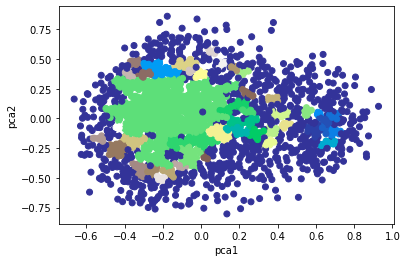

In [44]:
plt.scatter(trand_data2[:,0],trand_data2[:,1],c=labels,cmap='terrain')
plt.xlabel('pca1')
plt.ylabel('pca2')

### Comparision between Models

In [53]:
Kmscore=silhouette_score(trand_data2,model.labels_,metric='euclidean')
Hiscore=silhouette_score(trand_data2,hmodel.labels_,metric='euclidean')
DBscore=silhouette_score(trand_data2,db.labels_,metric='euclidean')
print('Silhoute scores')
print('--'*30)
print('Kmean      : ',Kmscore)
print('Hirachical : ',Hiscore)
print('DBSCAN     : ',DBscore)

Silhoute scores
------------------------------------------------------------
Kmean      :  0.4025149645195484
Hirachical :  0.28827753206400974
DBSCAN     :  -0.3127308187974912


### Identyfying the clusters

In [46]:
new_movie_df['target']=model.labels_
new_movie_df

,title_x,budget,original_language,popularity,revenue,runtime,vote_average,country,Lead_Actor,Second_Lead_Actor,Main_Production_House,Genres,Director,profit,Votes,Year,Month,target
0,Avatar,237000000,en,150.437577,2787965087,162.0,7.2,United States of America,Sam Worthington,Zoe Saldana,Ingenious Film Partners,Action,James Cameron,2550965087,High_vote,2009,10,1
1,Pirates of the Caribbean: At World's End,300000000,en,139.082615,961000000,169.0,6.9,United States of America,Johnny Depp,Orlando Bloom,Walt Disney Pictures,Adventure,Gore Verbinski,661000000,Avg_Vote,2007,5,1
2,Spectre,245000000,en,107.376788,880674609,148.0,6.3,United Kingdom,Daniel Craig,Christoph Waltz,Columbia Pictures,Action,Sam Mendes,635674609,Avg_Vote,2015,10,1
3,The Dark Knight Rises,250000000,en,112.312950,1084939099,165.0,7.6,United States of America,Christian Bale,Michael Caine,Legendary Pictures,Action,Christopher Nolan,834939099,High_vote,2012,7,1
6,Tangled,260000000,en,48.681969,591794936,100.0,7.4,United States of America,Zachary Levi,Mandy Moore,Walt Disney Pictures,Animation,Byron Howard,331794936,Avg_Vote,2010,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4409,Cure,17000000,ja,0.212443,99000,111.0,7.4,Japan,Koji Yakusho,Masato Hagiwara,Daiei Studios,Crime,Kiyoshi Kurosawa,-16901000,Less_Vote,1997,6,0
4413,Primer,17000000,en,23.307949,424760,77.0,6.9,United States of America,Shane Carruth,David Sullivan,Thinkfilm,Science Fiction,Shane Carruth,-16575240,Less_Vote,2004,8,2
4414,El Mariachi,17000000,es,14.269792,2040920,81.0,6.6,Mexico,Carlos Gallardo,Jaime de Hoyos,Columbia Pictures,Action,Robert Rodriguez,-14959080,Less_Vote,1992,4,2
4415,"Signed, Sealed, Delivered",17000000,en,1.444476,25871834,120.0,7.0,United States of America,Eric Mabius,Kristin Booth,Front Street Pictures,Comedy,Scott Smith,8871834,Less_Vote,2013,10,0


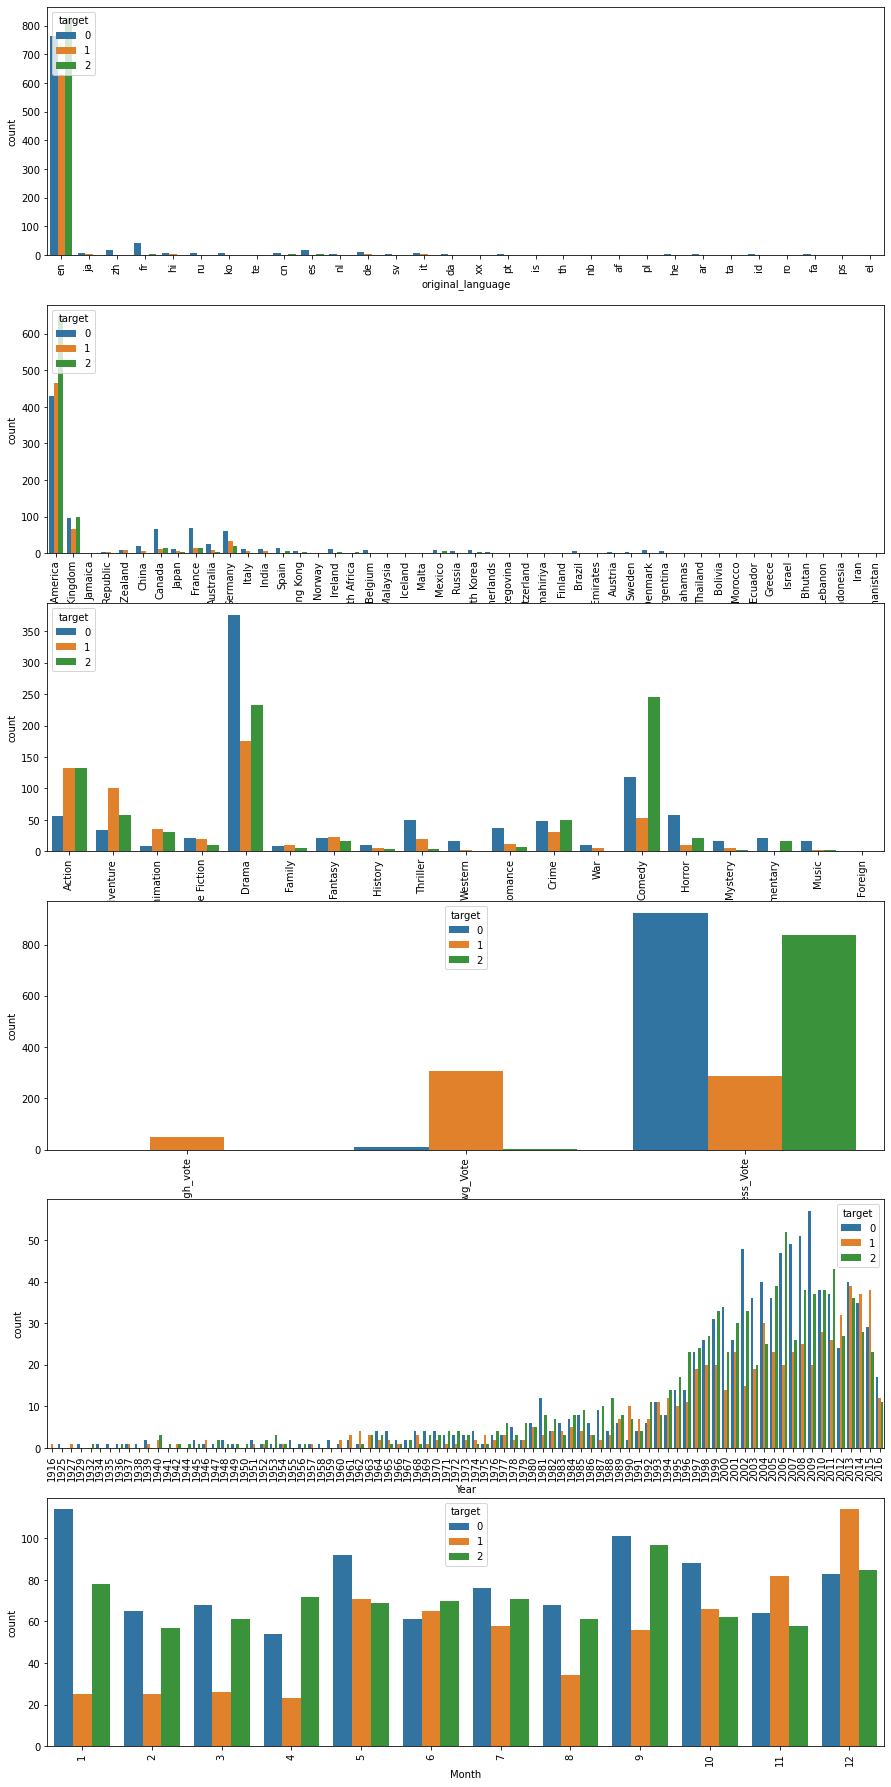

In [69]:
fig,ax=plt.subplots(6,1,figsize=(15,32))
ax=ax.ravel()
for i,j in zip(cat,range(len(cat))):
    sns.countplot(data=new_movie_df,x=i,hue='target',ax=ax[j])
    ax[j].tick_params(axis='x', rotation=90)

In [1]:
fig,ax=plt.subplots(3,2,figsize=(17,20))
ax=ax.ravel()
for i,j in zip(num,range(len(num))):
    sns.boxplot(data=new_movie_df,y=i,x='target',ax=ax[j])

                                     Good ratings                                            Average ratings 


NameError: name 'plt' is not defined

Cluster 0: movie having less profit,medium runtime and vote average,lowest revenue,less popularity and budget,with highest relesed in the starting month of the year having less vote and movie produced in cannda france and german belonging to drama category.

Cluster 1: having high vote avg,profit,revenue, runtime,budget and popularity,releaded in the end of the year,having highest high vote as well as average vote,adventure genre belongs to this category of the movie.

Cluster 2:less vote,medium profit and revenue, less runtime with average budget and popularity. movies are released in 2nd quarter on the month,This cluster belongs to the comedy category of the movie,This type of movies are produced in america and uk and Englist is the dominent language in this cluster.